| [⬅️ Previous Session](practice_4-1_pandas.ipynb) | [🏠 Course Home](../index.ipynb)

# Session 5-1: Matplotlib 📈

![mpl](./assets/mpl.png)



**Don't forget to start your notebook with a cell containing the import statements you need for the session.**

In [4]:
# given
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# mine
import numpy as np

## 📚  <b> Practice 1. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac1.png" alt="prac1" width="600"/>

/var/folders/fc/v8tnznkj26d0lsnntk3gf_mr0000gn/T/ipykernel_6700/2897306050.py:5: RuntimeWarning: divide by zero encountered in log
  log_fun = np.log(x)


Text(80, 3, 'y = log(x)')

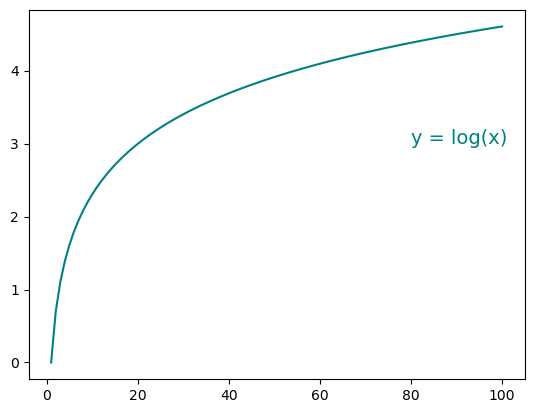

In [7]:
# set range 
x = range(0,101)

# generate log(x) function
log_fun = np.log(x)

# create empty figure
fig1 = plt.figure()

# Plot log(x) function
plt.plot(x, log_fun, color = 'teal') 

# add text
plt.text(80, 3, 'y = log(x)', size = 14, color = 'teal')


## 📚  <b> Practice 2. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac2.png" alt="prac2" width="600"/>

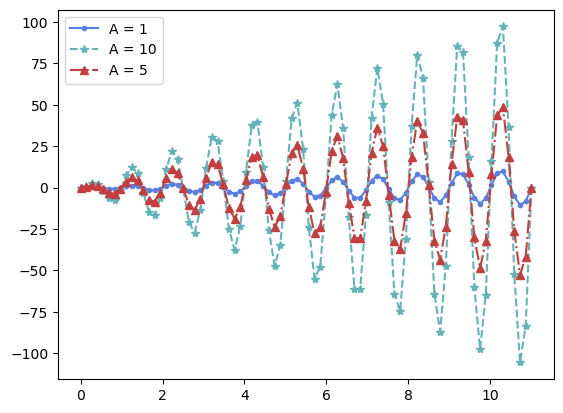

In [8]:
# set range
x = np.linspace(0,11, 80)

# generate lines for 3 values of A
a1 = 1 * x * (np.sin(2 * np.pi * x))
a10 = 10 * x * (np.sin(2 * np.pi * x))
a5 = 5 * x * (np.sin(2 * np.pi * x))

# create empty figure
fig2 = plt.figure()

# plot lines within figure
plt.plot(x, a1, label='A = 1', color=(.33, .5, .91), marker='.', linestyle = 'solid')
plt.plot(x, a10, label='A = 10', color=(.38, .71, .73), marker='*', linestyle = 'dashed')
plt.plot(x, a5, label='A = 5', color=(.78, .24, .24), marker='^', linestyle = 'dashdot')

# cusotmize colors and shapes
# add legend
plt.legend()


## 📚  <b> Practice 3. </b> 

Import the data from `./data/BSRN_data.csv` and plot the temperature and relative humidity over the month of October 2019 at the BSRN station. Be sure to format the timestamps and include axis labels, a title, and a legend, if necessary.



In [ ]:
# import data
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv')

#convert the first column to date time
bsrn['DATE'] = pd.to_datetime(bsrn['DATE'])

# limit to month of October
oct_bsrn = bsrn[
    bsrn['DATE'].dt.month == bsrn['DATE'].dt.month[10]]

# limit to year 2019
oct_2019 = oct_bsrn[
    oct_bsrn['DATE'].dt.year == oct_bsrn['DATE'].dt.year[2019]
]

# check data set
oct_2019['DATE'].unique()

oct_2019.head()

Text(0.2, 0.95, 'Relative Humidity & Temperature - BSRN October 2019')

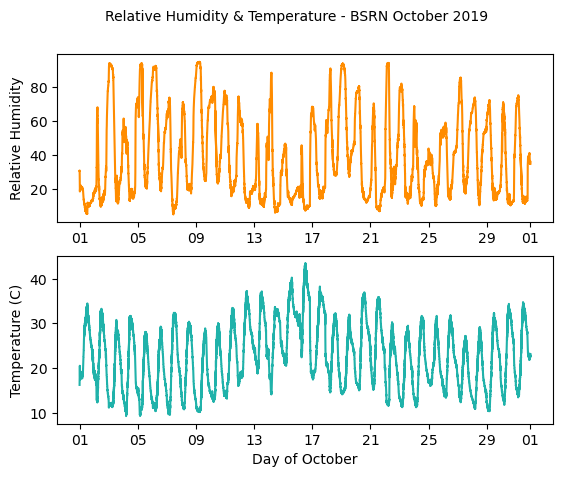

In [88]:
# Create empty figure
fig3 = plt.figure()

# Add 2 axes
    # 2 rows, 1 column, index position
ax1 = fig3.add_subplot(2,1,1)
ax2 = fig3.add_subplot(2,1,2)

# Plot data
ax1.plot(oct_2019['DATE'], oct_2019['RH'], color='darkorange')
ax2.plot(oct_2019['DATE'], oct_2019['T_degC'], color='lightseagreen')

# Format time stamps
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

# Create axis labels and title
ax2.set_xlabel('Day of October')
ax1.set_ylabel('Relative Humidity')
ax2.set_ylabel('Temperature (C)')
fig3.text(0.2, 0.95, 'Relative Humidity & Temperature - BSRN October 2019')


## 📚 Practice 4.

Saturation vapor pressure, \( $ e^*(T_a) $ \), is the maximum pressure of water vapor that can exist in equilibrium above a flat plane of water at a given temperature. It can be calculated from the Tetens equation:

$$ e^{*}(T_{a}) = a \times exp({\frac{b \cdot T_{a}}{T_{a} + c}}) $$

where $ T_a $ is the air temperature in °C, $ a = 0.611  $ kPa,  $ b = 17.502  $, and  $ c = 240.97 °C  $.

1. Calculate \( $ e^*(T_a) $ \) in kPa for all temperatures in `bsrn`.


In [ ]:
# create new column with saturation vapor pressure
bsrn['saturation_kPa'] = 0.611 * np.exp((17.502 * bsrn['T_degC']) / (bsrn['T_degC'] + 240.97 )
)


2. Plot temperature vs. saturation vapor pressure for the BSRN station. Be sure to format your plot appropriately and include axis labels, a title, and a legend, if necessary.


Text(0, 0.5, 'Vapor Pressume (kPa)')

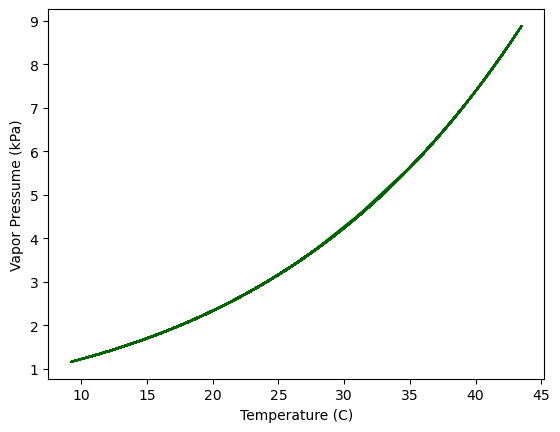

In [99]:
# Create empty figure
fig4 = plt.figure()

# Create plot
plt.plot(bsrn['T_degC'], bsrn['saturation_kPa'], color='darkgreen')

# Change axes titles
plt.xlabel('Temperature (C)')
plt.ylabel('Vapor Pressume (kPa)')


3. Compare your plot to Figure 3-1 in Campbell and Norman (1998), included below. Do they look more or less the same?

![cn](./assets/campbell_norman_fig3-1.png)

yes :)


## 📚  <b> Practice 5. </b> 
The difference between saturation vapor pressure and ambient air pressure is called vapor pressure deficit, $\textit{VPD}$. $\textit{VPD}$ can be calculated from saturation vapor pressure and relative humidity, $h_r$, as follows:
$$ \textit{VPD} \, = \, e^*(T_a) \cdot (1 \, - \, h_r)$$
where $h_r$ is expressed as a fraction.

1. Calculate the vapor pressure deficit for the BSRN data.


In [ ]:
bsrn['vpd'] = bsrn['saturation_kPa'] * (1 - (bsrn['RH']/100))


2. Calculate the mean hourly $RH$ and $\textit{VPD}$ over the entire month.

In [103]:
# Add new column with humidity as a fraction
bsrn['RH_fraction'] = bsrn['RH'] / 100

head


1. Plot $RH$ and $\textit{VPD}$ as a function of time of day. (for extra python points, try plotting both variables on one plot using [ax.twinx()](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html))
1. How does relative humidity vary throughout the day? Why?
1. Compare your plot(s) to Figure 3-3 in Campbell and Norman (1998). How do the values of $e^*(T_a)$ and $\textit{VPD}$ for the BSRN station compare to those at constant vapor pressure in Figure 3-3?

![cn](./assets/campbell_norman_fig3-3.png)


<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>